### Inspect Raw Columns

In [2]:
import pandas as pd

df = pd.read_csv("../data/twcs/twcs.csv")  # adjust filename if different

# Show first few rows
df.head()

# Check all available columns
df.columns

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')

### Filter & Label the Tweets

In [3]:
import numpy as np

# Drop rows with missing text
df = df.dropna(subset=["text"])

# Create a new column 'message_type'
def classify_message(row):
    if row["inbound"] and pd.isna(row["in_response_to_tweet_id"]):
        return "customer_complaint_or_inquiry"
    elif not row["inbound"] and not pd.isna(row["response_tweet_id"]):
        return "company_response"
    else:
        return "other"

df["message_type"] = df.apply(classify_message, axis=1)

### Preview Label Distribution

<Axes: title={'center': 'Message Type Distribution'}, xlabel='message_type'>

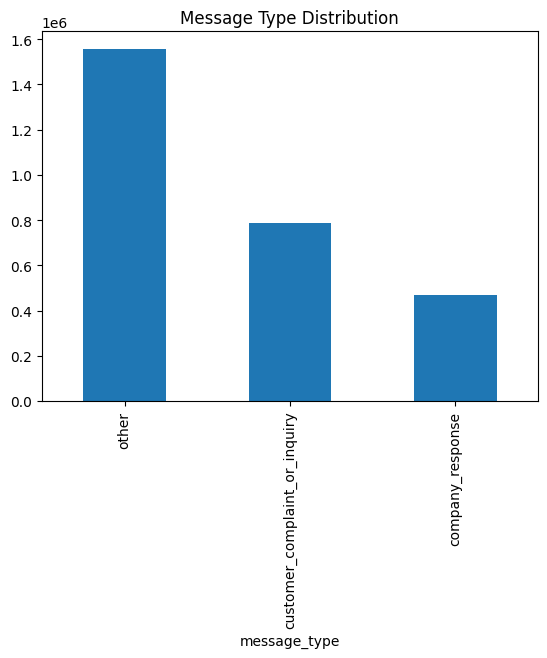

In [4]:
df["message_type"].value_counts().plot(kind='bar', title="Message Type Distribution")

### Drop "other" rows assuming they are not meaningful for the classification task

In [5]:
df = df[df["message_type"] != "other"]